In [10]:
import numpy as np
import pandas as pd
import neurokit2 as nk
import matplotlib.pyplot as plt
import scipy.fftpack
import scipy.signal

In [86]:
plt.rcParams['figure.figsize'] = [15, 10]

In [12]:
def load_eda_data(f):
    # Read datafile.
    data = pd.read_csv(f, header=1, sep="\t", low_memory=False)
    # Remove first col.
    data = data.drop(0, axis=0)
    # Convert To Float data (pandas pulls in as strings because of the label col removed above).
    for col in data.columns:
        data[f"{col}"] = data[f"{col}"].astype("float")
    # get EDA column name
    eda_col = [x for x in filter(lambda x: x.endswith('GSR_Skin_Conductance_CAL'), data.columns)][0]
    data = data.rename(columns={eda_col: 'GSR_Skin_Conductance_CAL'})
    return data#[0:10000]

In [13]:
A_sig = load_eda_data("A/CPS2-ASU-T10-PA-ExpBlock1-physioHR.csv")
B_sig = load_eda_data("B/CPS2-ASU-T25-PC-ExpBlock2-physioHR.csv")
C_sig = load_eda_data("C/CPS2-ASU-T32-PA-ExpBlock2-physioHR.csv")
F_sig = load_eda_data("F/CPS2-ASU-T34-PC-ExpBlock1-physioHR.csv")


B_sig_bad_data_ex = load_eda_data("B/CPS2-ASU-T20-PA-ExpBlock1-physioHR.csv")

In [14]:
eda_col = "GSR_Skin_Conductance_CAL"
tmp_df = pd.DataFrame({"A": A_sig[eda_col], "B": B_sig[eda_col], "C": C_sig[eda_col], "F": F_sig[eda_col]})

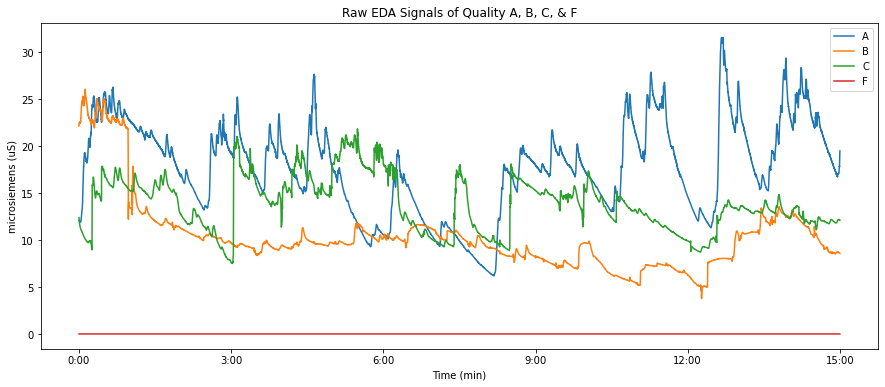

In [15]:
plt.plot(tmp_df)
plt.legend(tmp_df.columns)
plt.title("Raw EDA Signals of Quality A, B, C, & F")
plt.ylabel('microsiemens (uS)')
plt.xlabel('Time (min)')
plt.xticks(np.arange(0, len(tmp_df)+1, len(tmp_df)/5), ['0:00','3:00','6:00','9:00','12:00', '15:00'])
plt.show()

In [102]:
def fft_and_plot(signal, sample_freq):
    # Number of sample points
    N = len(signal)

    # Spaces between samples
    T = 1.0 / sample_freq
    
    # Time steps
    t = np.linspace(0, (N-1)*T, N) 
    
    # perform FFT
    yf = scipy.fftpack.fft(signal)
    yf[0] = yf[0]/2
    xf = np.linspace(0.0, 1.0/(2.0*T), int(N/2))

    fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1)
    ax1.plot(t, signal)
    ax2.plot(xf, 2.0/N * np.abs(yf[:int(N/2)]))
    
    ax1.set_xlabel('Time')
    ax2.set_xlabel('Freq (Hz)')
    
    ax1.set_title("Signal")
    ax2.set_title("DFT")
    
    plt.tight_layout()
    plt.show()

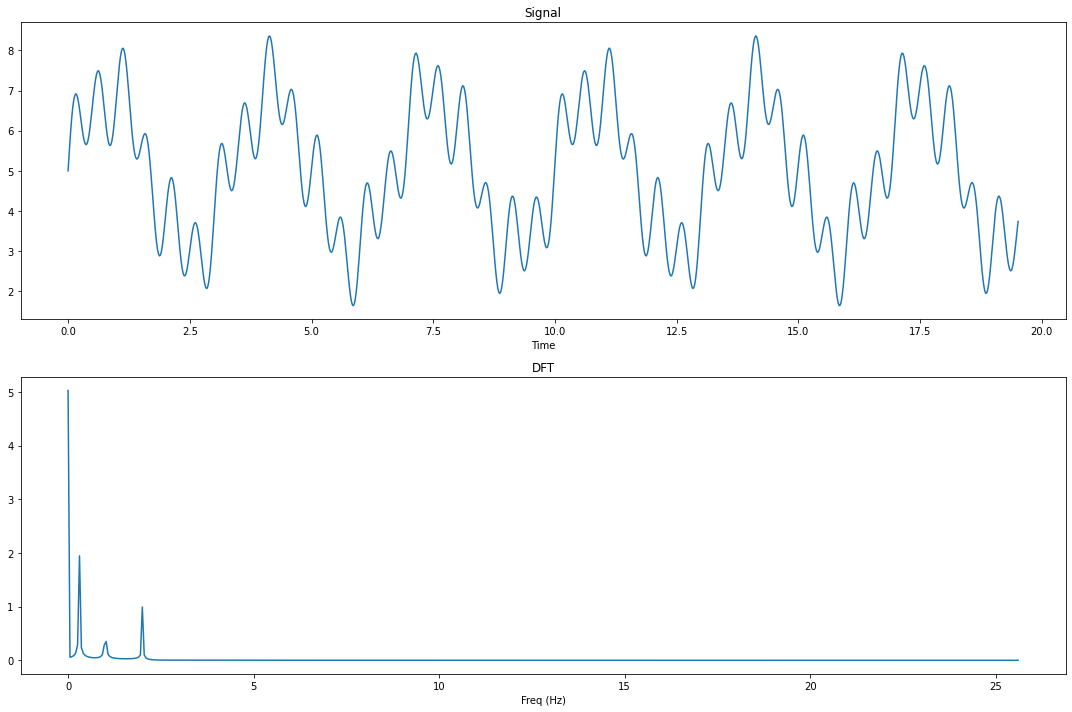

In [103]:
N = 1000
T = 1.0 / 51.2
x = np.linspace(0.0, N*T, N)
synth_signal = 5 + np.sin(2.0 * 2.0 * np.pi * x) + 0.5*np.sin(1.0 * 2.0 * np.pi * x) + 2.0*np.sin(0.3 * 2.0 * np.pi * x)
fft_and_plot(synth_signal, 51.2)

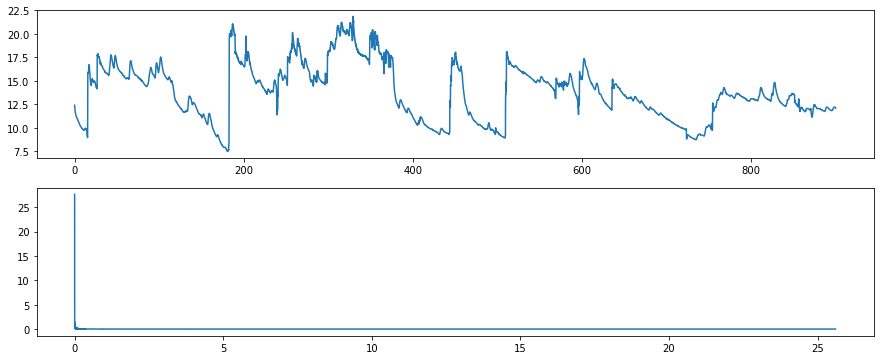

In [22]:
fft_and_plot(C_sig[eda_col].to_numpy(), 51.2)

In [24]:
def plot_spectrogram(signal, sample_freq):
    f, t, Sxx = scipy.signal.spectrogram(signal, sample_freq)
    plt.pcolormesh(t, f[:10], Sxx[:10], shading='gouraud')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.show()

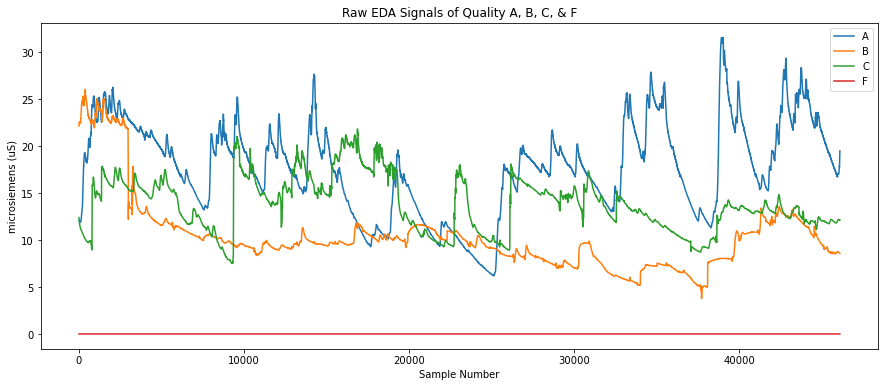

In [25]:
plt.plot(tmp_df)
plt.legend(tmp_df.columns)
plt.title("Raw EDA Signals of Quality A, B, C, & F")
plt.ylabel('microsiemens (uS)')
plt.xlabel('Sample Number')
#plt.xticks(np.arange(0, 15.0, step=1.0))
plt.show()

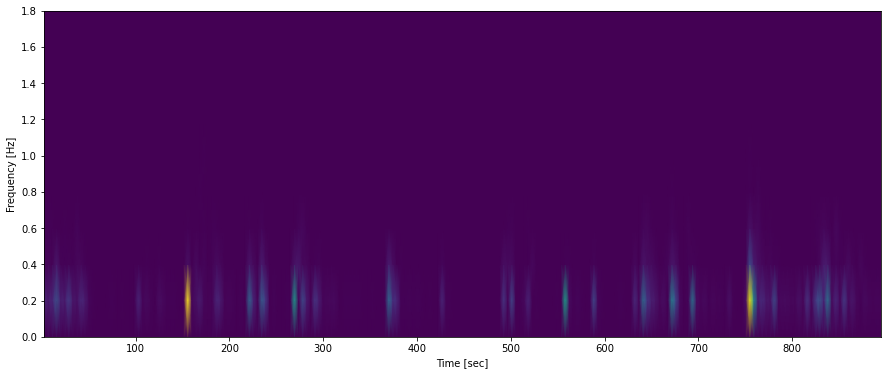

In [26]:
plot_spectrogram(A_sig[eda_col], 51.2)

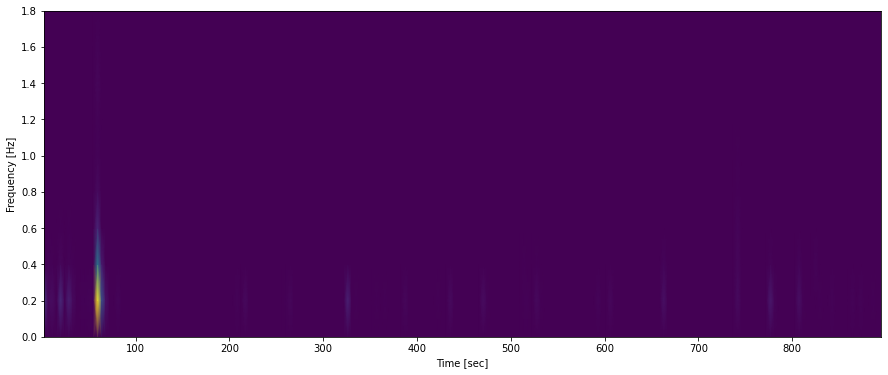

In [27]:
plot_spectrogram(B_sig[eda_col], 51.2)

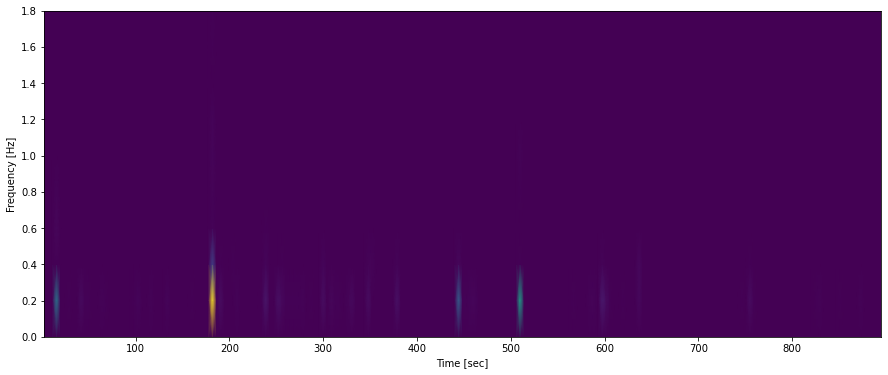

In [28]:
plot_spectrogram(C_sig[eda_col], 51.2)

In [29]:
A_sig[eda_col]

1        12.0866
2        12.0920
3        12.0866
4        12.0866
5        12.0812
          ...   
46076    19.1344
46077    19.2090
46078    19.3209
46079    19.3955
46080    19.5074
Name: GSR_Skin_Conductance_CAL, Length: 46080, dtype: float64

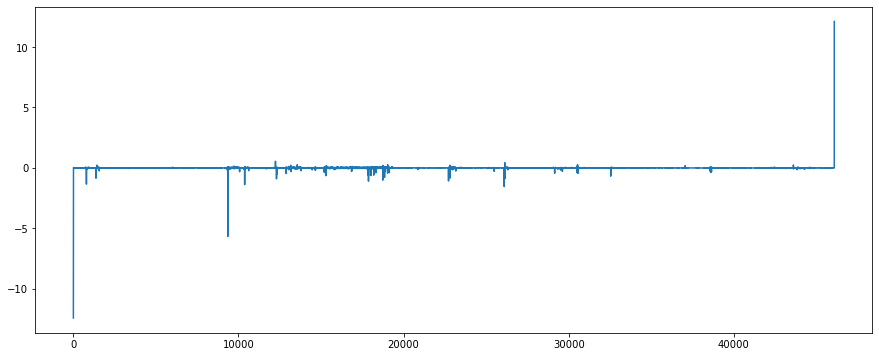

In [30]:
# First order derivative kernel is [-1,1]
plt.plot(np.convolve(C_sig[eda_col], [-1,1]))

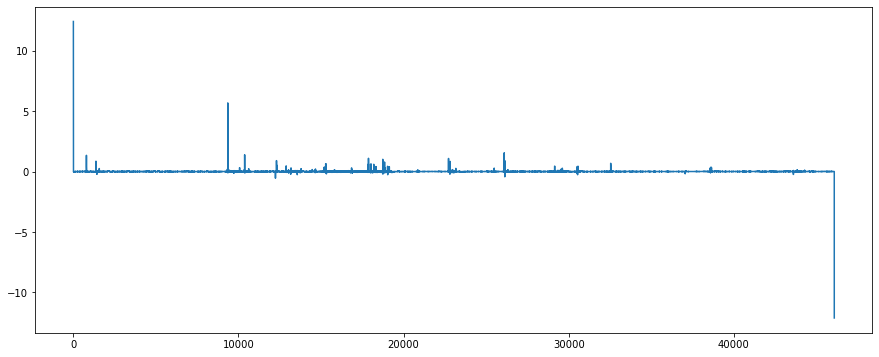

In [31]:
plt.plot(np.convolve(C_sig[eda_col], [1,-1]))

In [109]:
a_chunk = C_sig[eda_col][1000:2000]

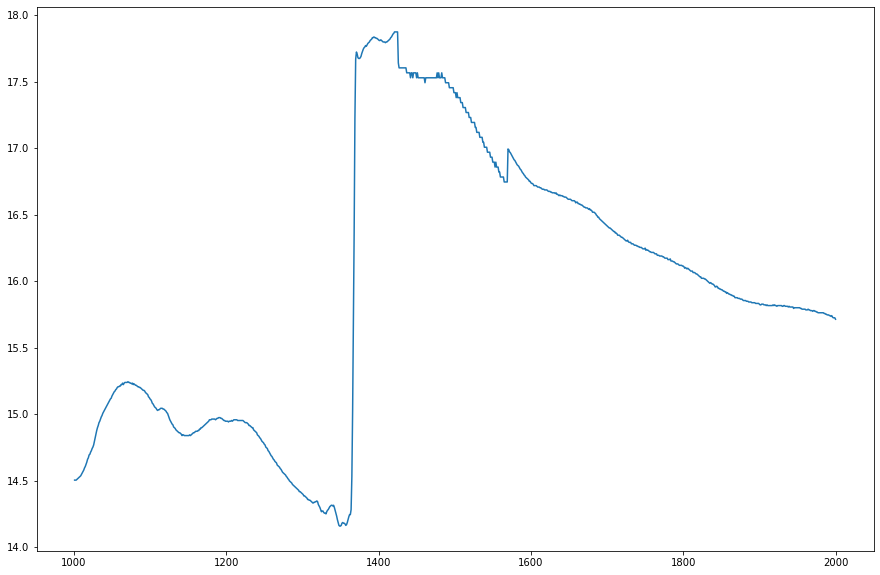

In [110]:
plt.plot(a_chunk)

In [111]:
a_chunk_clean = nk.eda_clean(a_chunk, 51.2, 'neurokit')
a_chunk_clean_bsp = nk.eda_clean(a_chunk, 51.2, 'biosppy')

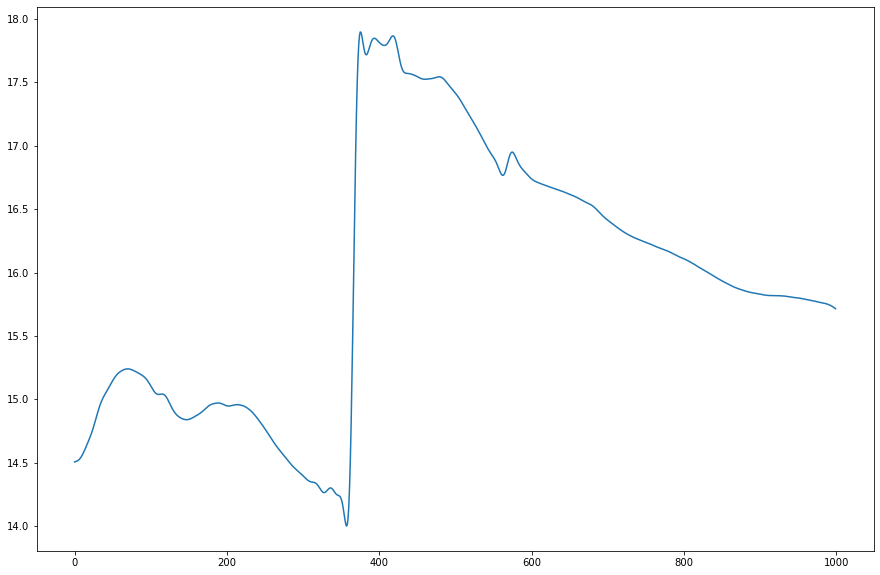

In [112]:
plt.plot(a_chunk_clean)

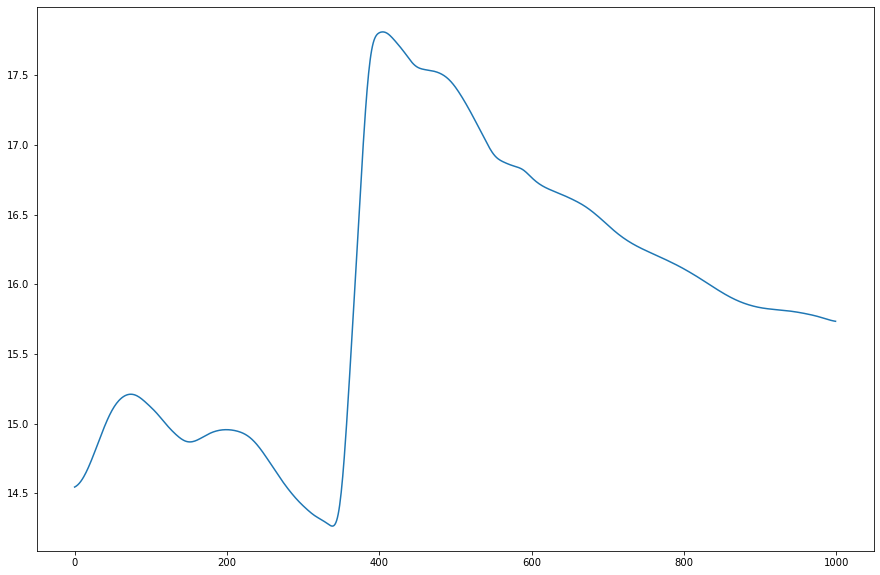

In [113]:
plt.plot(a_chunk_clean_bsp)

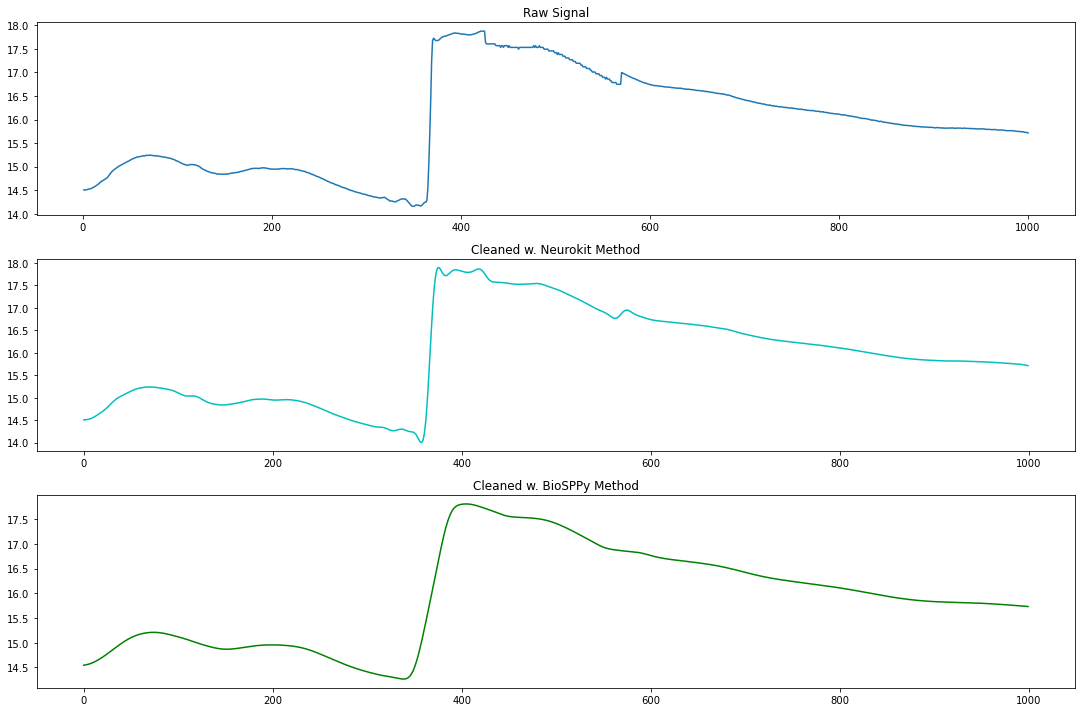

In [114]:
fig, [ax1, ax2, ax3] = plt.subplots(nrows=3, ncols=1)
ax1.plot(a_chunk)
ax2.plot(a_chunk_clean, color='c')
ax3.plot(a_chunk_clean_bsp, color='g')

ax1.set_title("Raw Signal")
ax2.set_title("Cleaned w. Neurokit Method")
ax3.set_title("Cleaned w. BioSPPy Method")

ax1.set_xticks(np.arange(1000,2001,200))
ax1.set_xticklabels(['0', '200', '400', '600', '800', '1000'])
#(np.arange(0, len(tmp_df)+1, len(tmp_df)/5), ['0:00','3:00','6:00','9:00','12:00', '15:00'])

plt.tight_layout()

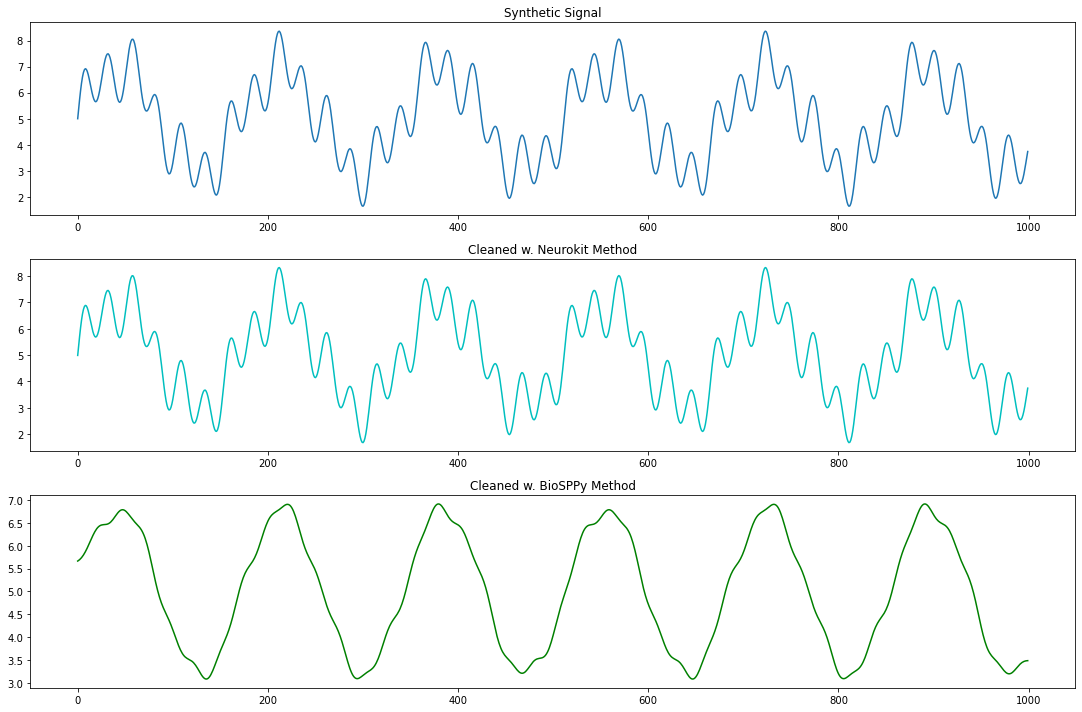

In [92]:
synth_nk = nk.eda_clean(synth_signal, 51.2, 'neurokit')
synth_bsp = nk.eda_clean(synth_signal, 51.2, 'biosppy')

fig, [ax1, ax2, ax3] = plt.subplots(nrows=3, ncols=1)
ax1.plot(synth_signal)
ax2.plot(synth_nk, color='c')
ax3.plot(synth_bsp, color='g')

ax1.set_title("Synthetic Signal")
ax2.set_title("Cleaned w. Neurokit Method")
ax3.set_title("Cleaned w. BioSPPy Method")

#ax1.set_xticks(np.arange(1000,2001,200))
#ax1.set_xticklabels(['0', '200', '400', '600', '800', '1000'])
#(np.arange(0, len(tmp_df)+1, len(tmp_df)/5), ['0:00','3:00','6:00','9:00','12:00', '15:00'])

plt.tight_layout()

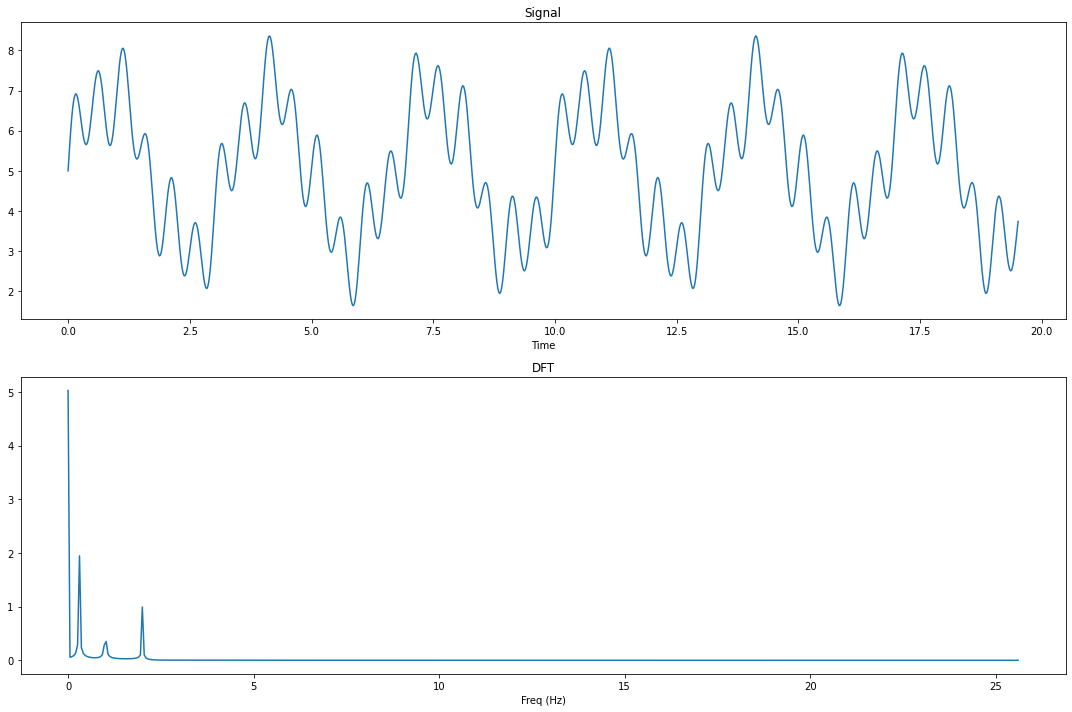

In [104]:
fft_and_plot(synth_signal, 51.2)

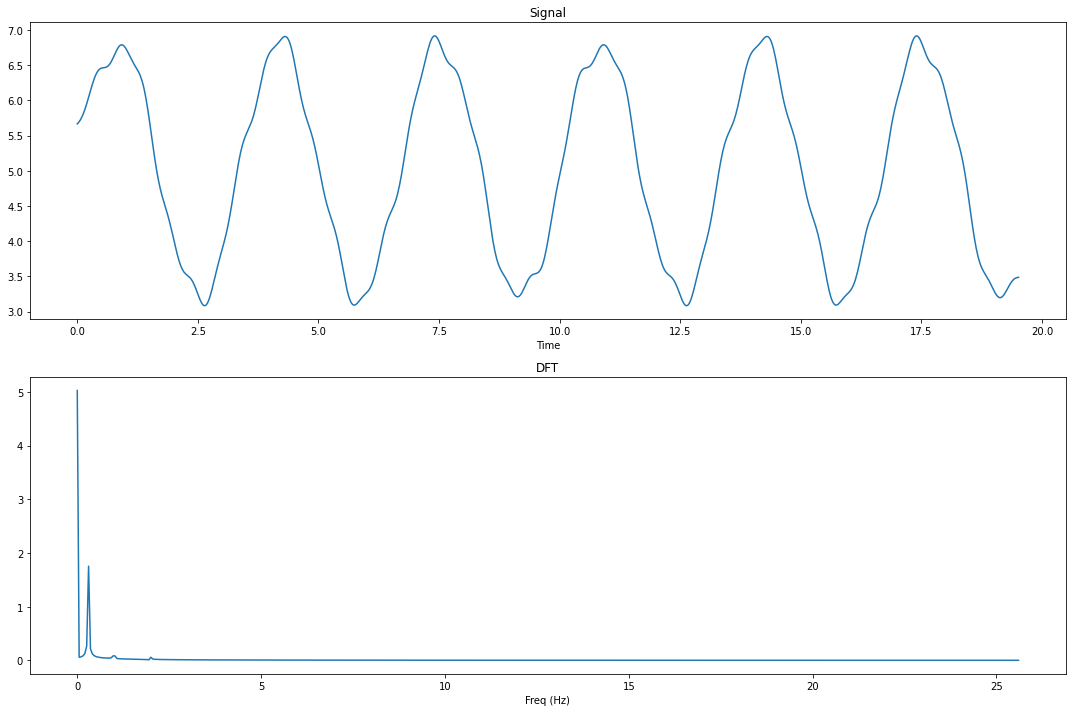

In [105]:
fft_and_plot(synth_bsp, 51.2)

In [135]:
first = 1.0
last = 2.0
signal = np.array([1.0, -3.5, 4.2, 2.0])
signal = abs(np.array([first, first] + signal.tolist() + [last, last]))

In [138]:
signal[2:-2]

array([1. , 3.5, 4.2, 2. ])

In [139]:
def detect_motion_artifacts(signal):
    kernel = [-1,1]
    first_elt = signal[0]
    last_elt = signal[-1]
    signal = np.array([first_elt, first_elt] + signal.tolist() + [last_elt, last_elt]) # pad ends for convolution to prevent edge artifacts
    signal_conv = abs(np.convolve(signal, kernel))
    signal_conv = signal_conv[2:-2] # remove padded elts
    return signal_conv

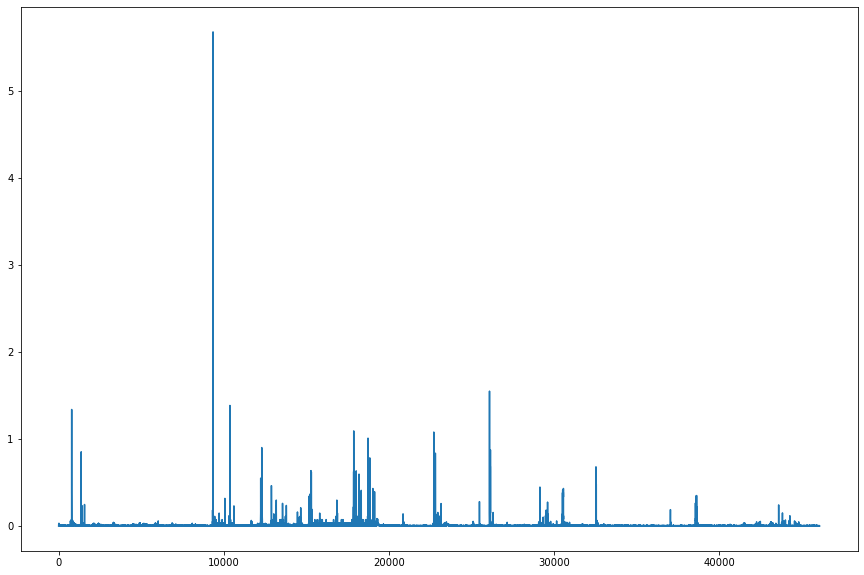

In [145]:
plt.plot(detect_motion_artifacts(C_sig[eda_col].to_numpy()))

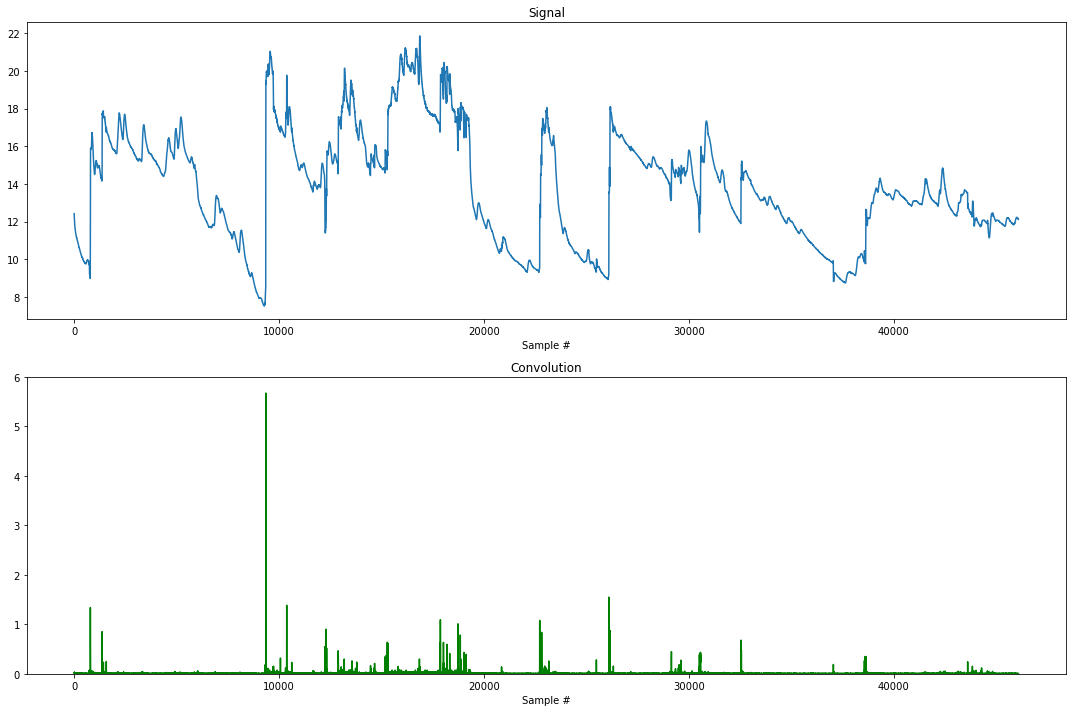

In [157]:
fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1)
ax1.plot(C_sig[eda_col])
ax2.plot(detect_motion_artifacts(C_sig[eda_col].to_numpy()), color='g')

ax1.set_xlabel('Sample #')
ax2.set_xlabel('Sample #')

ax1.set_title("Signal")
ax2.set_title("Convolution")

ax2.set_ylim(0,6)

plt.tight_layout()
plt.show()

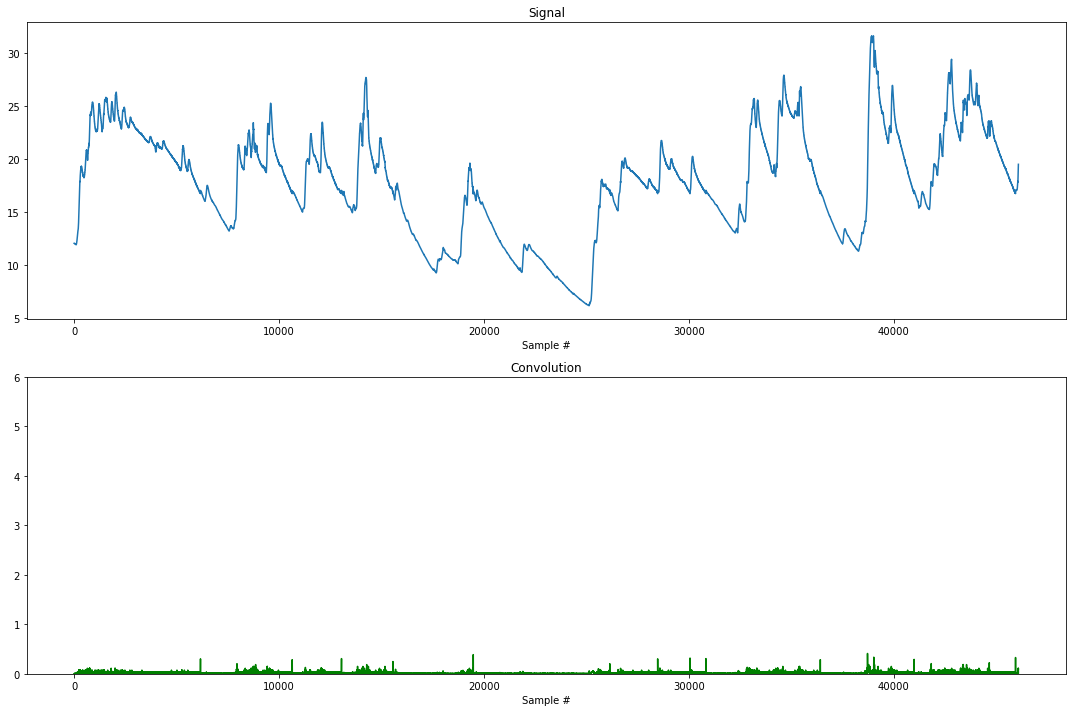

In [158]:
fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1)
ax1.plot(A_sig[eda_col])
ax2.plot(detect_motion_artifacts(A_sig[eda_col].to_numpy()), color='g')

ax1.set_xlabel('Sample #')
ax2.set_xlabel('Sample #')

ax1.set_title("Signal")
ax2.set_title("Convolution")

ax2.set_ylim(0,6)

plt.tight_layout()
plt.show()